In [1]:
import zipfile
zip_ref = zipfile.ZipFile('breast-cancer-wisconsin-data.zip', 'r')
zip_ref.extractall('raw_data')
zip_ref.close()

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
df=pd.read_csv('raw_data/data.csv')

In [31]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [32]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [33]:
df['id']=df['id'].apply(str)

In [34]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [37]:
columns_name=df.columns
columns_name

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [63]:
features_mean= list(df.columns[2:12])
features_se= list(df.columns[12:22])
features_worst=list(df.columns[22:32])

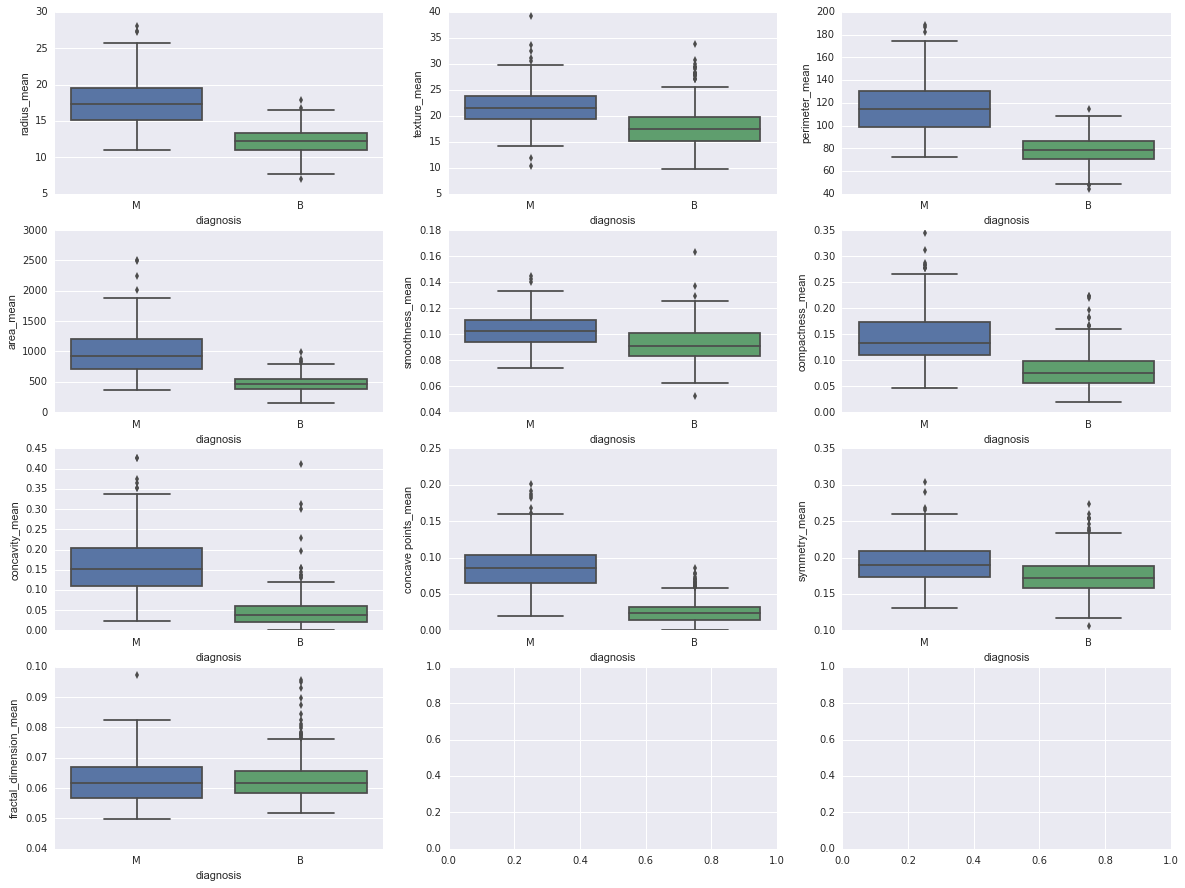

In [61]:
f, axarr = plt.subplots(4,3,figsize=(20,15))
for i in range(10):
    row=i//3
    col=i-row*3
    sns.boxplot(x="diagnosis", y=features_mean[i],data=df,ax=axarr[row,col])

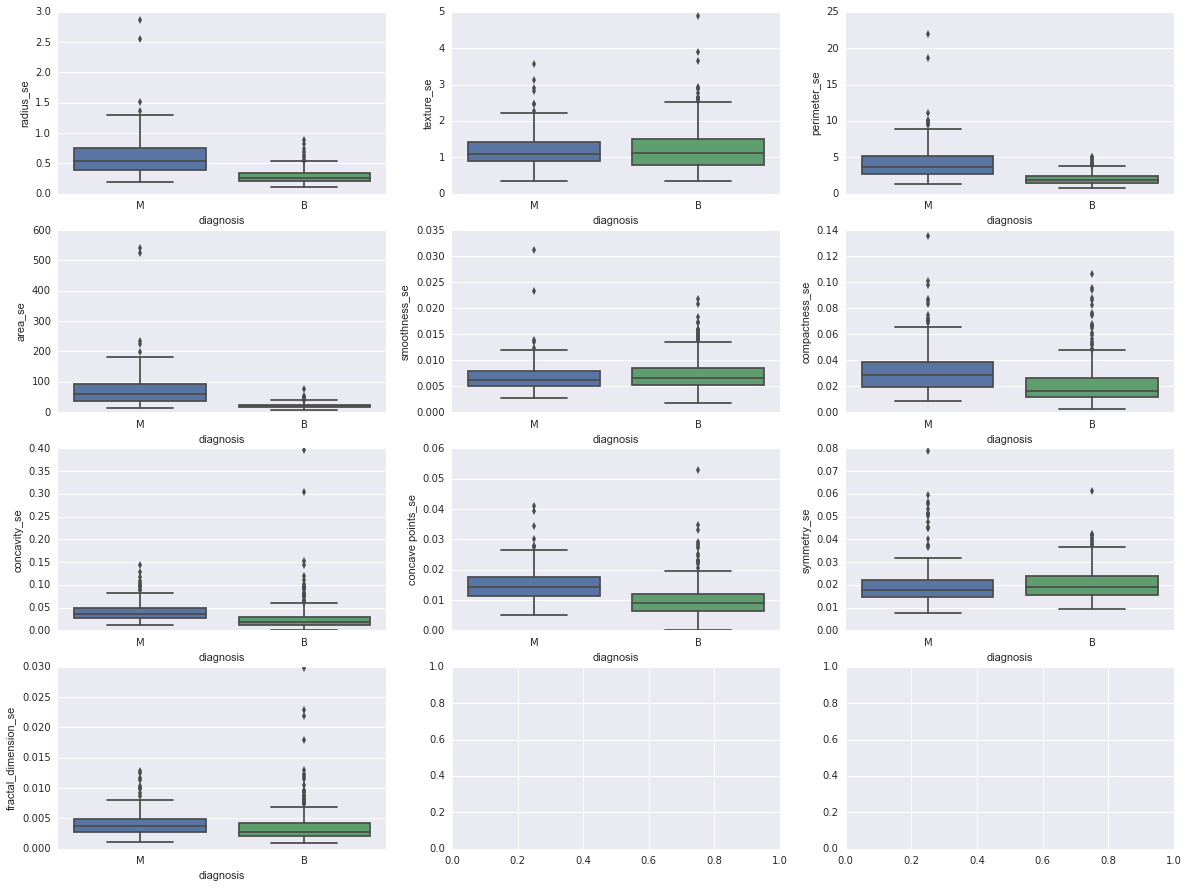

In [64]:
f, axarr = plt.subplots(4,3,figsize=(20,15))
for i in range(10):
    row=i//3
    col=i-row*3
    sns.boxplot(x="diagnosis", y=features_se[i],data=df,ax=axarr[row,col])

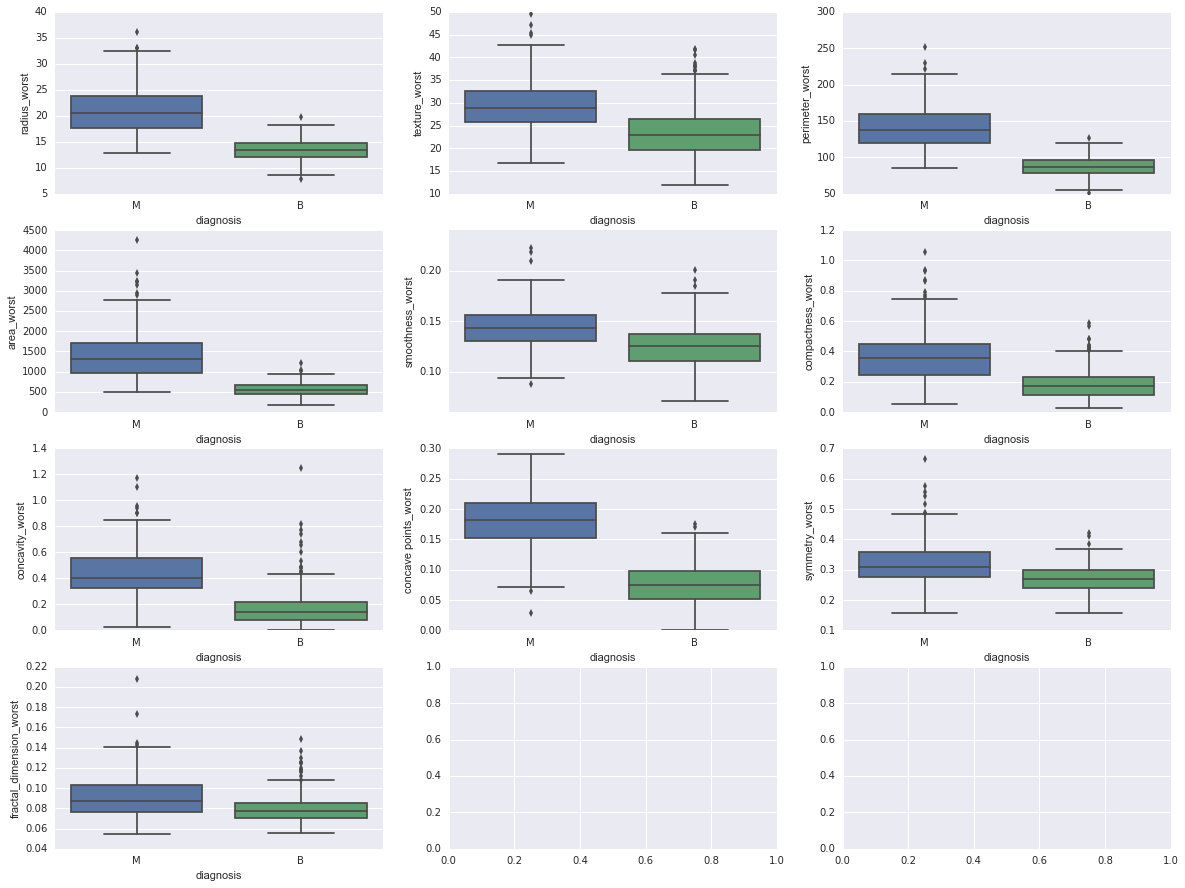

In [65]:
f, axarr = plt.subplots(4,3,figsize=(20,15))
for i in range(10):
    row=i//3
    col=i-row*3
    sns.boxplot(x="diagnosis", y=features_worst[i],data=df,ax=axarr[row,col])

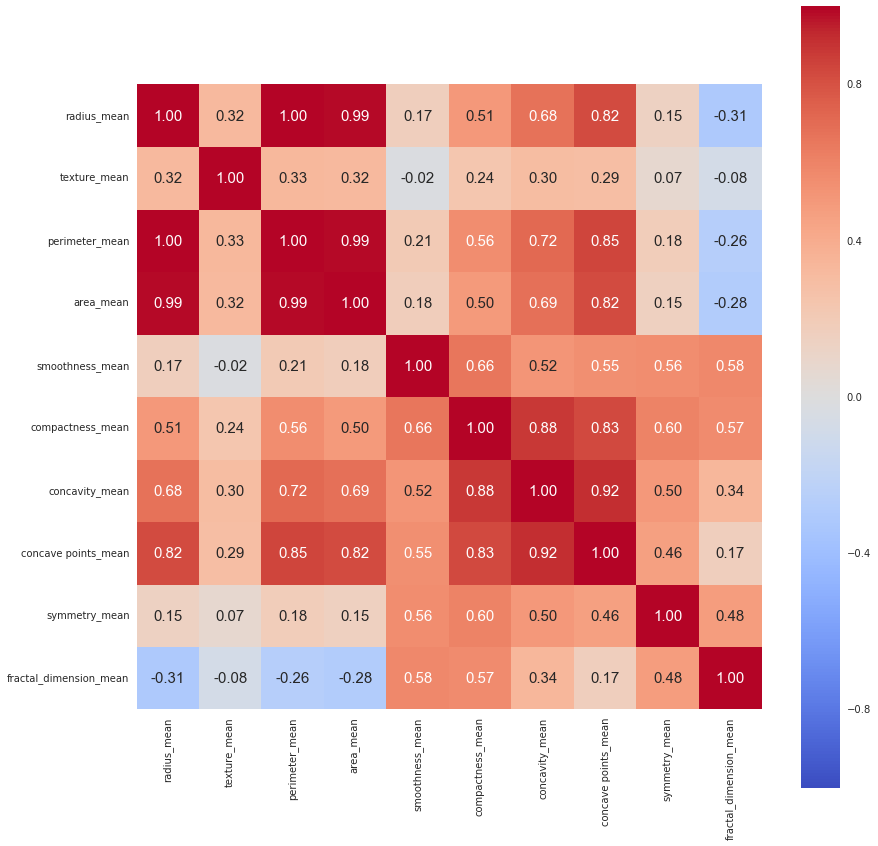

In [68]:
corr = df[features_mean].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr.as_matrix(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'coolwarm') 

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score

In [12]:
def feature_scaling(features):
    scaled=[]
    for feature in np.array(features).T:
        min_val=min(feature)
        max_val=max(feature)
        scaled_feature=(feature-min_val)/float(max_val-min_val)
        scaled.append(scaled_feature)
    return np.array(scaled).T

In [100]:
def model_running(clf,features,labels):
    cv=StratifiedShuffleSplit(n_splits=100, test_size=0.3)
    f_score=[]
    accuracy=[]
    for train_idx, test_idx in cv.split(features, labels): 
        features_train,labels_train = features[train_idx],labels[train_idx]
        features_test,labels_test = features[test_idx],labels[test_idx]
        clf.fit(features_train,labels_train)
        f_score.append(f1_score(labels_test,clf.predict(features_test)))
        accuracy.append(clf.score(features_test,labels_test))
    print('F1: ',np.mean(f_score))
    print('Accuracy: ',np.mean(accuracy))

In [71]:
from sklearn.linear_model import LogisticRegression

In [24]:
target_num_map = {'B':-1, 'M':1}
labels=df['diagnosis'].apply(lambda x: target_num_map[x]).as_matrix()
df['diagnosis_num']=df['diagnosis'].map({'M':1,'B':-1})

In [105]:
feature_names=['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']
features=df[feature_names].as_matrix()
features=feature_scaling(features)

In [123]:
clf=LogisticRegression(C=100)

In [124]:
model_running(clf,features,labels)

F1:  0.899593968024
Accuracy:  0.926432748538


In [125]:
print(clf.coef_)
print(clf.intercept_)

[[  7.69604939  24.06490345   7.65368912   3.51287535   2.98472698]]
[-16.42600442]


In [87]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
clf=DecisionTreeClassifier()

In [157]:
feature_names=columns_name[2:]
features=df[feature_names].as_matrix()

In [140]:
model_running(clf,features,labels)

F1:  0.90002442316
Accuracy:  0.924970760234


In [91]:
from sklearn.ensemble import AdaBoostClassifier

In [158]:
clf=AdaBoostClassifier(n_estimators=20)

In [159]:
model_running(clf,features,labels)

F1:  0.941823811839
Accuracy:  0.95701754386


In [148]:
clf.feature_importances_

array([ 0.  ,  0.04,  0.02,  0.  ,  0.02,  0.04,  0.02,  0.04,  0.04,
        0.  ,  0.02,  0.  ,  0.02,  0.12,  0.  ,  0.1 ,  0.  ,  0.  ,
        0.  ,  0.04,  0.02,  0.06,  0.  ,  0.1 ,  0.08,  0.  ,  0.1 ,
        0.1 ,  0.02,  0.  ])

In [155]:
for feature in zip(columns_name[2:],clf.feature_importances_):
    print(feature)

('radius_mean', 0.0)
('texture_mean', 0.040000000000000001)
('perimeter_mean', 0.02)
('area_mean', 0.0)
('smoothness_mean', 0.02)
('compactness_mean', 0.040000000000000001)
('concavity_mean', 0.02)
('concave points_mean', 0.040000000000000001)
('symmetry_mean', 0.040000000000000001)
('fractal_dimension_mean', 0.0)
('radius_se', 0.02)
('texture_se', 0.0)
('perimeter_se', 0.02)
('area_se', 0.12)
('smoothness_se', 0.0)
('compactness_se', 0.10000000000000001)
('concavity_se', 0.0)
('concave points_se', 0.0)
('symmetry_se', 0.0)
('fractal_dimension_se', 0.040000000000000001)
('radius_worst', 0.02)
('texture_worst', 0.059999999999999998)
('perimeter_worst', 0.0)
('area_worst', 0.10000000000000001)
('smoothness_worst', 0.080000000000000002)
('compactness_worst', 0.0)
('concavity_worst', 0.10000000000000001)
('concave points_worst', 0.10000000000000001)
('symmetry_worst', 0.02)
('fractal_dimension_worst', 0.0)
